In [1]:
%load_ext autoreload
%autoreload 2

Before running this:
```
pip install -r requirements.txt
bash ./scripts/download_model.sh
```

In [2]:
from IPython.display import Image
import skimage
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import src.edge_connect

In [4]:
ip = src.edge_connect.InPainter()

/home/marcotcr/work/edge-connect/src/config.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self._dict = yaml.load(self._yaml)


Loading EdgeModel generator...
Loading InpaintingModel generator...


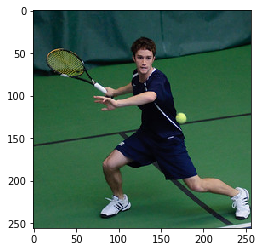

In [77]:
image = skimage.io.imread('examples/places2/images/places2_08.png')
plt.imshow(image)

In [6]:
def masked(image, mask):
    a = image.copy()
    a[mask != 0] = 0
    return a

In [11]:
# mask1

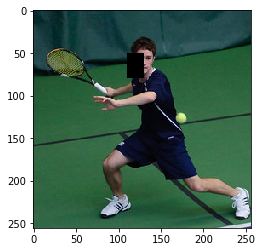

In [21]:
mask1 = np.zeros(image.shape[:2], 'int')
mask2 = np.zeros(image.shape[:2], 'int')
mask3 = np.zeros(image.shape[:2], 'int')
mask4 = np.zeros(image.shape[:2], 'int')
mask1[40:100, 10:100] = 1
mask2[20:, 80:200] = 1
mask2[100:120, 60:80] = 1
mask2[190:260, 200:255] = 1
mask3[110:140, 160:190] = 1
mask4[50:80, 110:130] = 1
plt.imshow(masked(image, mask4))
plt.show()


In [22]:
images = [image, image, image, image]
masks = [mask1, mask2, mask3, mask4]
a = ip.inpaint(images, masks)

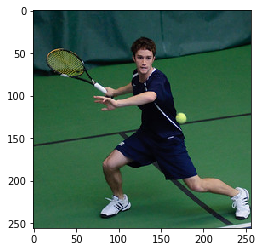

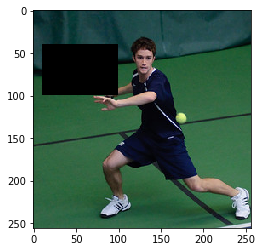

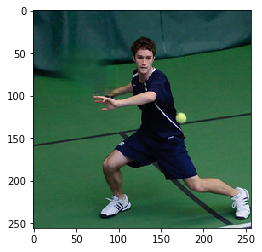

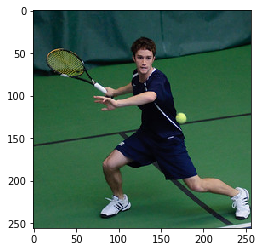

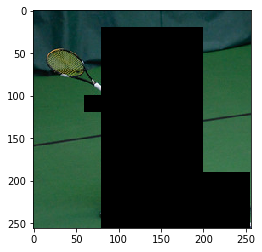

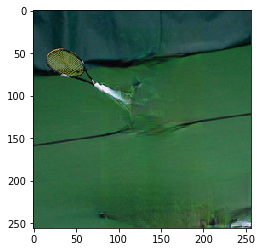

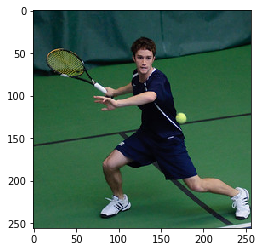

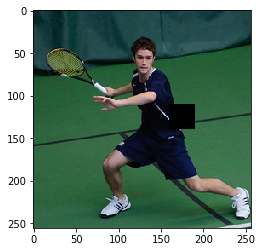

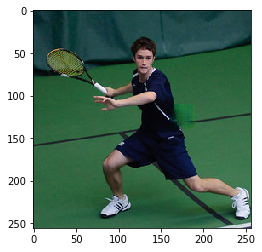

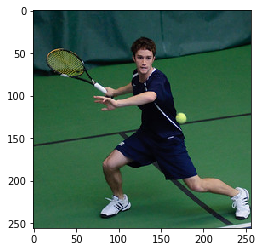

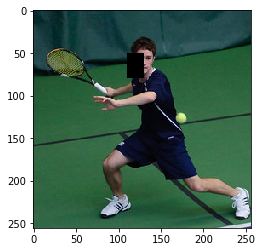

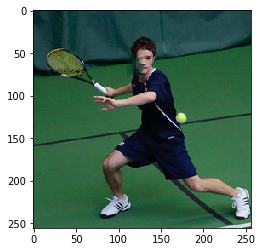

In [23]:
for i, m, inp in zip(images, masks, a):
    plt.imshow(i)
    plt.show()
    plt.imshow(masked(i, m))
    plt.show()
    plt.imshow(inp)
    plt.show()
    

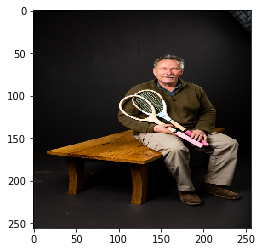

In [87]:
from PIL import Image
import requests
from io import BytesIO
url = 'https://www.boatbuildingacademy.com/wp-content/uploads/2018/04/th2.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.save('/tmp/a.png')
img = skimage.io.imread('/tmp/a.png')
img = skimage.util.img_as_ubyte(skimage.transform.resize(img, (256, 256)))
plt.imshow(img)
image = img

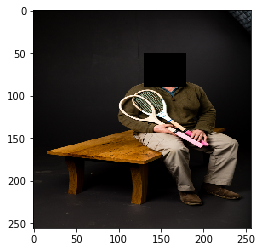

In [90]:
mask1 = np.zeros(image.shape[:2], 'int')
mask2 = np.zeros(image.shape[:2], 'int')
mask1[95:155, 95:200] = 1
mask2[50:90, 130:180] = 1
plt.imshow(masked(image, mask2))
plt.show()

In [91]:
images = [image, image]
masks = [mask1, mask2]
a = ip.inpaint(images, masks)

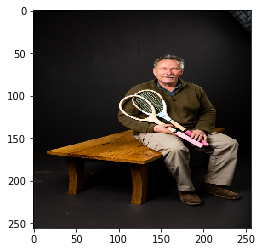

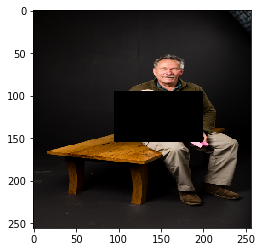

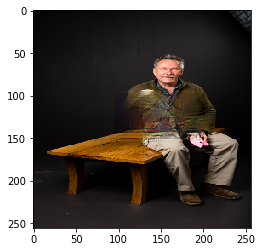

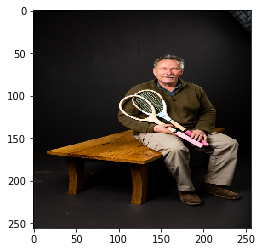

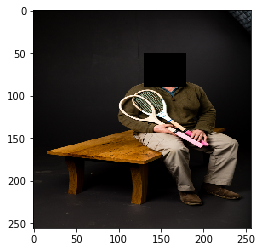

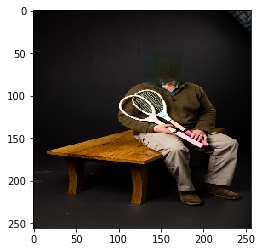

In [92]:
for i, m, inp in zip(images, masks, a):
    plt.imshow(i)
    plt.show()
    plt.imshow(masked(i, m))
    plt.show()
    plt.imshow(inp)
    plt.show()
    

In [94]:
images = []
masks = []
for i in range(1, 8):
    img = skimage.io.imread('examples/places2/images/places2_0%d.png' % i)
    images.append(img)
    img = skimage.io.imread('examples/places2/masks/places2_0%d.png' % i)
    masks.append(img)

In [95]:
a = ip.inpaint(images, masks)

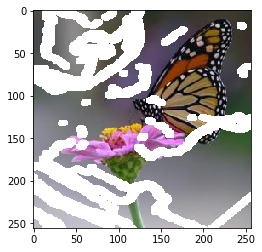

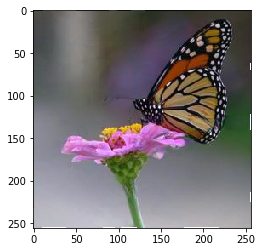

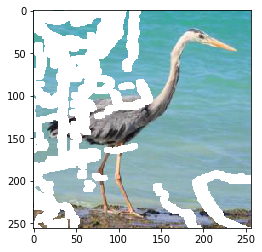

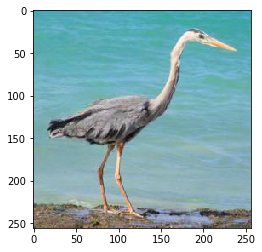

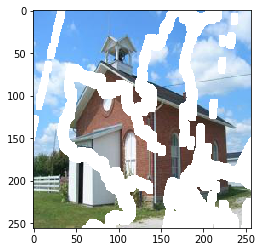

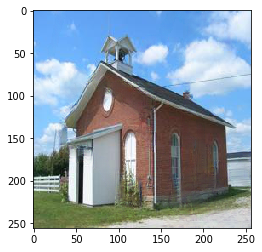

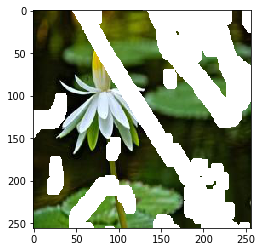

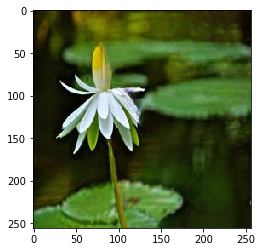

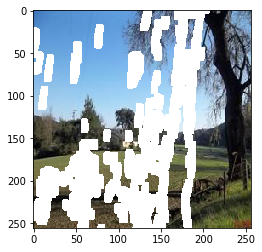

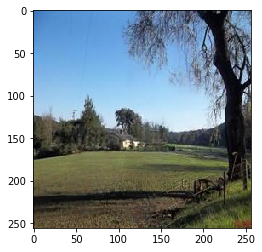

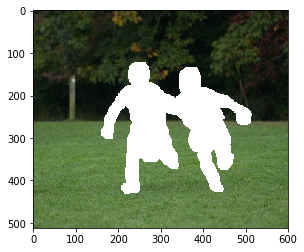

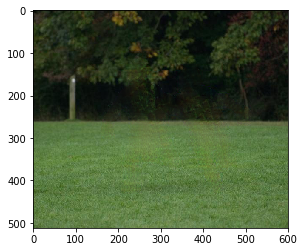

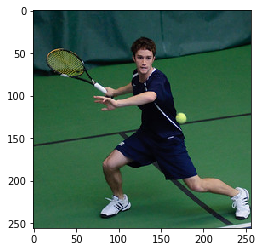

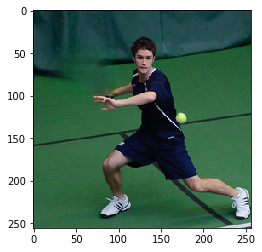

In [96]:
for i, m, inp in zip(images, masks, a):
    plt.imshow(i)
    plt.show()
#     plt.imshow(masked(i, m))
#     plt.show()
    plt.imshow(inp)
    plt.show()
    